Reported by: Natasha Flores (24-april-2025)

Exporting REACT results to shapefiles (a shapefile per year in this case)

In [1]:
import os
import sys
import xugrid as xu
import xarray as xr
sys.path.insert(1, '../library')
from DEcoImpact_exp_func import DEIOutput


In [2]:
#configuration

#list with input locations of D-Eco Impact export file that needs to be converted
list_ds_in = [r'../results/SpongeWorks/results_REACT_WFLOW_flooding_zones_Step1_Vecht_2017-2023.nc'] 

# list with variables that need to be exported to shapefile. Note, these should only contain faces as axes (no time or depth etc).
rename_list_variabels = {'flooded_on_land'  : 'flood_land',
                         'number_of_inundations_on_land'  : 'NInun_land',
                         'number_of_dry_periods_in_river'  : 'NDry_river',
                         'avg_dry_fall_duration_periods_in_river'  : 'DryDurRiver',
                         }

#output path location for shapefile data created 
output_path = r'example_output_data/shapefile_output_Inundation_Zones_Others'

#make sure the folders to output path exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

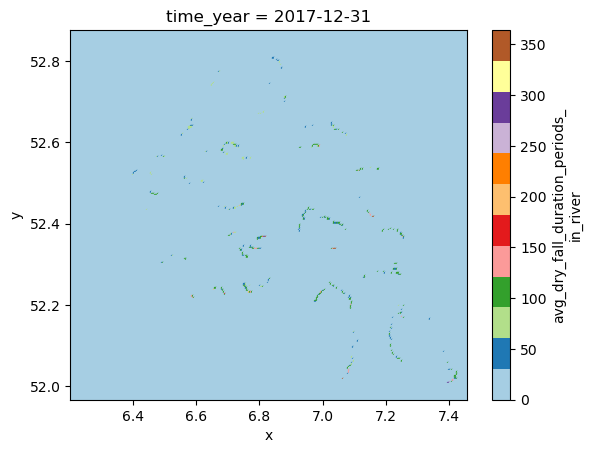

In [3]:
#read and show result
#Show result of one specific year for 
uda_map = xu.open_mfdataset(list_ds_in)
uda_map["avg_dry_fall_duration_periods_in_river"].sel(time_year= "2017-12-31 00:00:00").ugrid.plot(cmap = "Paired")


In [4]:
#export a seperate Netcdf per year to convert to shapefile and adapt variable names so they fit the shapefile column
uda_map = uda_map.rename_vars(rename_list_variabels)
subsetted_uda_map = uda_map[list(rename_list_variabels.values())]

list_ds_in_per_year = []

#export a netcdf file per year calculated and store the path
for time_year_value in uda_map.time_year.values:
    time_subsetted_uda_map = subsetted_uda_map.sel(time_year = time_year_value)
    year = time_year_value.astype('datetime64[Y]').astype(int) + 1970
    file_path = "results/to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1_" + str(year) + ".nc"
    list_ds_in_per_year.append(file_path)
    time_subsetted_uda_map.ugrid.to_netcdf(file_path)


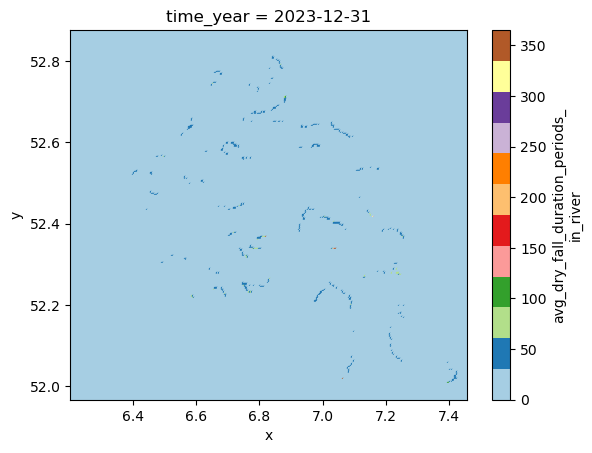

In [5]:
#read and show result
#Show result of one specific year for 
uda_map_test = xu.open_mfdataset(list_ds_in_per_year[-1])
uda_map_test["DryDurRiver"].ugrid.plot(cmap = "Paired")


In [7]:
#initialize
DEIresults = DEIOutput()
cwd = os.getcwd()
DEIresults.set_root(root = cwd)

#Add paths to the result NetCDF(s) (skip first of list as 2010 has no data due to rolling statistic)
DEIresults.set_paths_to_DEIresults(input_list_path = list_ds_in_per_year[0:])

#Export to Shapefile
DEIresults.translate_UgridNetCDFs_to_Shape(
    list_variables = list(rename_list_variabels.values()),
    output_path = output_path
)

print("Done.")

Shortened variable name 'DryDurRiver' to 'DryDurRiv
Start with results/to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1_2017.nc
Time dimension supplied in data variable flood_land, only first timestep is used for exporting.
Exported example_output_data/shapefile_output_Inundation_Zones_Others\to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1_2017
Start with results/to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1_2018.nc
Time dimension supplied in data variable flood_land, only first timestep is used for exporting.
Exported example_output_data/shapefile_output_Inundation_Zones_Others\to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1_2018
Start with results/to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1_2019.nc
Time dimension supplied in data variable flood_land, only first timestep is used for exporting.
Exported example_output_data/shapefile_output_Inundation_Zones_Others\to_shape_results_REACT_WFLOW_calibrate_flooding_zones_Step1